 # Convolutional neural networks (CNNs) 
  - Used for computer vision (detecting patterns in visual data)
  - Will be working with food images from [Food-101 Dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-05 19:35:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.16.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   169MB/s    in 0.6s    

2023-02-05 19:35:41 (169 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# View directory within the pizza_steak directory
!ls pizza_steak

test  train


In [3]:
# View directory within train directory
!ls pizza_steak/train/

pizza  steak


In [4]:
# View directory within steak directory
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
# Viewing file structure

import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


750 training images and 250 testing images of pizza and steak

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
# Create function to view random image given directory and class

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image (ex. '379737.jpg')
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


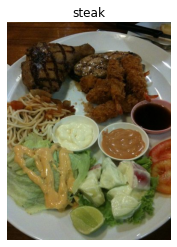

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [9]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 384, 3)

Scale (normalize) pixel values by dividing the image array by 255 (RBG max value)

In [10]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.32156863, 0.20392157, 0.10196078],
        [0.33333333, 0.21568627, 0.11372549],
        [0.34117647, 0.22352941, 0.12156863],
        ...,
        [0.34509804, 0.36470588, 0.34117647],
        [0.3372549 , 0.35686275, 0.33333333],
        [0.31764706, 0.3372549 , 0.31372549]],

       [[0.32156863, 0.20392157, 0.10196078],
        [0.32941176, 0.21176471, 0.10980392],
        [0.3372549 , 0.21960784, 0.11764706],
        ...,
        [0.34509804, 0.36470588, 0.3372549 ],
        [0.33333333, 0.35294118, 0.3254902 ],
        [0.31764706, 0.3372549 , 0.30980392]],

       [[0.22352941, 0.11372549, 0.01960784],
        [0.22352941, 0.11372549, 0.01960784],
        [0.22745098, 0.11764706, 0.02352941],
        ...,
        [0.36078431, 0.36862745, 0.3254902 ],
        [0.35294118, 0.36078431, 0.30980392],
        [0.34117647, 0.34901961, 0.29803922]],

       ...,

       [[0.14117647, 0.07843137, 0.01568627],
        [0.1372549 , 0.0745098 , 0.01176471],
        [0.13333333, 0

# A (typical) architecture of a convolutional neural network

| Hyperparameter/Layer      | What does it do? | Typical value     |
| :---        |    :----   |          :--- |
| Input Image(s)      | Target images used to discover patterns       | A photo image   |
| Input Layer   | Takes in target images and preprocesses them for other layers        | input_shape = [batch_size, image_height, image_width, color_channels]      |
| Convolution Layer      | Extracts/learns the most important features from target images       | Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)   |
| Hidden Activation   | Adds non-linearity to learned features (non-straight lines)        | Usually ReLU (tf.keras.activations.relu)      |
| Pooling Layer      | Reduces the dimensionality of learned image features       | Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)   |
| Fully Connected Layer   | Further refines learned features from convolution layers        | tf.keras.layers.Dense      |
| Output Layer      | Takes learned features and outputs them in shape of target labels       | output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)   |
| Output Activation   | Adds non-linearities to output layer        | tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax      |

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Seed for reproducibility 
tf.random.set_seed(42)

# Normalizing the data (get all pixel values down between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32, # Number of images to process at a time
                                               target_size=(224, 224), # Convert all images to be 224x224
                                               class_mode="binary", # Classification type (steak or pizza)
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output            
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 278ms/step - loss: 0.5587 - accuracy: 0.7193 - val_loss: 0.4488 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 13s 266ms/step - loss: 0.4344 - accuracy: 0.8033 - val_loss: 0.3248 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3984 - accuracy: 0.8133 - val_loss: 0.3230 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3627 - accuracy: 0.8413 - val_loss: 0.3555 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3311 - accuracy: 0.8627 - val_loss: 0.3285 - val_accuracy: 0.8580


In [12]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Using a previous model we built before

  - Examplify how neural networks can be adapted to many different problems.
  - Things that will be changed:
    - The data - working images instead of dots
    - The input shape - tell neutral network shape of our images

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.9664 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the noticeable things is that model_2 had much more parameters than model_1. 

model_2 has 602,116 trainable parameters whereas model_1 only has 28901 yet mode_1 still out performed model_2 (accurancy 87% to 50%)

Why?

"A convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image."

In [15]:
# Trying to improve model_2

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'), # increase neurons from 4 to 100
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'), # Added an extra hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 3.9446 - accuracy: 0.5853 - val_loss: 0.6130 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 1.0042 - accuracy: 0.6673 - val_loss: 0.6889 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.7278 - accuracy: 0.7187 - val_loss: 0.6541 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5013 - accuracy: 0.7800 - val_loss: 0.4550 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5608 - accuracy: 0.7573 - val_loss: 0.4999 - val_accuracy: 0.7680


In [16]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Good improvement from 50% accuracy to 70%. However, trainable parameters increased even more yet still doesn't out perform model_1


---



---



# Binary classification: Breaking down our CNN model

Going through each step one by one:
  1. Become one with the data (visualize, visualize, visualize...)
  2. Preprocess the data (prepare it for a model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve model (try to beat your baseline)
  7.Repeat until satisfied

# 1. Importing and becoming one with the data

- Good to visualize at least 10-100 samples
- Check for potential patterns
- Check for wrong labeling

Image shape: (382, 512, 3)
Image shape: (512, 512, 3)


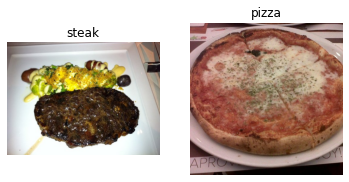

In [17]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (preparing it for the model)

- Creating training and test sets (in our case, its already split)
- Standard to have data separated into train and test directories with subfolders for each class

In [18]:
# Define training and test set directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

- Turn data into batches
- Batches: small subset of the dataset a model looks at during training. (Example: Look at 32 images at a time rather than 10,000 at once)

- Why?
  - 10,000 images (or more) at once might not fit into memory of processor
  - Model might not learn well with such large amounts being learned at once
  - 32 is a good batch size, proven to be effective

In [19]:
# Create train and test data generatiors rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

ImageDataGenerator class helps prepare the images
- rescale parameter transforms our pixel value by 255 (RBG mac values)

With the ImageDataGenerator instances, we can now load images from respective directories using the flow_from_directory method

In [20]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Breaking down the code above:

- Based on our directory stucture, we have subdirectories 'train_dir' and 'test_dir'
- target_size = defines the input size of our images in (heigh, walk)
- class_mode = the type of classification porblem (in our case its 'binary', if more than two classes then 'categorical')
- batch_size = how many images in each batch to be preprocessed at a time, default is 32

In [21]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [22]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [23]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Since our class_mode parameter was set to 'binary', our label is either 0 (pizza) or 1 (steak)

# 3. Create a model 

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
# Create 3 layer CNN
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Breaking down the components of Conv2D layer:
- 2D = input is two-dimentional (height and width)
- filters = number of "feature extractors" that will be moving over the images
- kernel_size = size of the filters. For example kernel_size of (3,3) (or just 3) will look at a space of 3x3 pixels at a time. Smaller the kernel, the more fine-grained features it will extract
- stride = number of pixels a filter will move across as it covers the image. stride of 1 means filter will move across each pixel 1 by 1
- passing = can either be "same" or "valid". "same" will add zeros to ourside of image so resulting output is same as input whereas "valid" will cut off excess pixels where filter doesn't fit

What is a "feature'?
- Considered to be any significant part of an image
- Ex. circular shape of pizza or rough edges of steak
- Not defined by us but instead by model as it learns

In [26]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# 4. Fit a model

In [27]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [28]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 2.2795 - accuracy: 0.6020 - val_loss: 0.4871 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4585 - accuracy: 0.7980 - val_loss: 0.4121 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3603 - accuracy: 0.8587 - val_loss: 0.4633 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2705 - accuracy: 0.9047 - val_loss: 0.4335 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1427 - accuracy: 0.9527 - val_loss: 0.4698 - val_accuracy: 0.8040


Breaking down the code above:

- steps_per_epoch = number of batches a model will go through per epoch. In our case, we have 1500 training data images in batches of 32 = 1500/32 = ~ 47 steps
- validation_steps = same as above but for test data (500 test images in batches of 32 = 500/32 = ~16 steps)

# 5. Evaluate the model

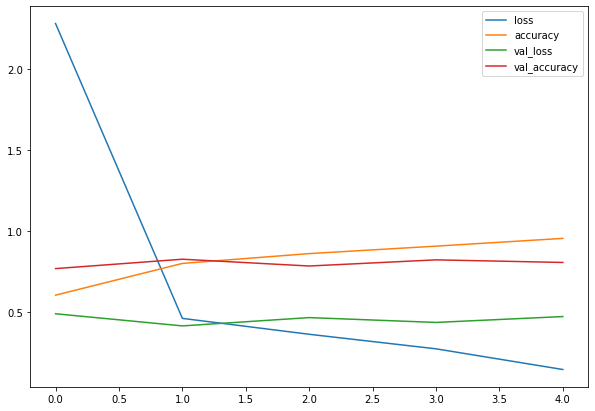

In [29]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [30]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  

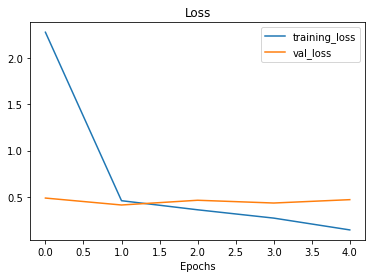

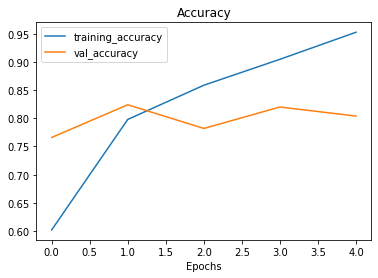

In [31]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [32]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 6. Adjust the model parameters

Fitting the machine learning model in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce the overfitting

These will further overfit the model: 
- Increase number of convolutional layers
- Increase number of convolutional filters
- Add anotehr dense layer to the output of the flattened layer

Will now focus on reducing the overfitting instead by building 2 more models
1. ConvNet with max pooling
2. ConvNet with max pooling and data augmentation

In [33]:
# Create the model (same as model_4 but with MaxPool2D() layer after each convolutional layer)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Convolutional layers learns the features of an image while the Max Pooling layers figure out the most important of those features

In [34]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [35]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6285 - accuracy: 0.6460 - val_loss: 0.5072 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4842 - accuracy: 0.7887 - val_loss: 0.4107 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4420 - accuracy: 0.8100 - val_loss: 0.3737 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4113 - accuracy: 0.8293 - val_loss: 0.3933 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4060 - accuracy: 0.8140 - val_loss: 0.3449 - val_accuracy: 0.8440


In [36]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Notice that the shape of MaxPooling2D layer gets halved each time. This is it getting rid of unimportant features and only keeping the most important features

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However too big and model might not learn properly.



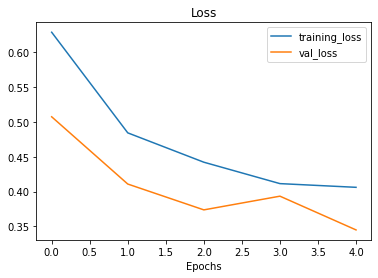

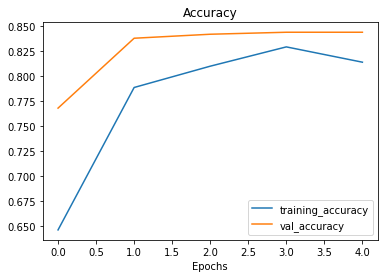

In [37]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Trying another method of overfitting prevention - 'data augmentation'

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [38]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Visualizing data augmentation

In [40]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same


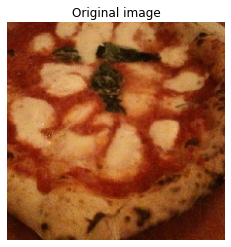

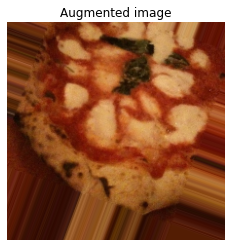

In [41]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.



In [42]:
# Refit the model using augmented training data

# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 565ms/step - loss: 0.7358 - accuracy: 0.4687 - val_loss: 0.6892 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 35s 742ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6874 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6899 - accuracy: 0.5667 - val_loss: 0.6778 - val_accuracy: 0.5380
Epoch 4/5
47/47 [==============================] - 26s 562ms/step - loss: 0.6901 - accuracy: 0.5487 - val_loss: 0.6639 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 24s 498ms/step - loss: 0.6742 - accuracy: 0.5727 - val_loss: 0.6142 - val_accuracy: 0.6400


Model didn't perform too well. 

When we created train_data_augmented, shuffle=False which means our model only sees a batch of a single kind of images at a time.

In [43]:
# Check model's performance history training on augmented data
#plot_loss_curves(history_6)

In [44]:
# Shuffling the data

# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [45]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 575ms/step - loss: 0.6477 - accuracy: 0.6093 - val_loss: 0.5799 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 27s 585ms/step - loss: 0.5779 - accuracy: 0.6973 - val_loss: 0.4751 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4914 - accuracy: 0.7693 - val_loss: 0.4588 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4767 - accuracy: 0.7613 - val_loss: 0.4332 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 29s 622ms/step - loss: 0.4875 - accuracy: 0.7640 - val_loss: 0.3673 - val_accuracy: 0.8400


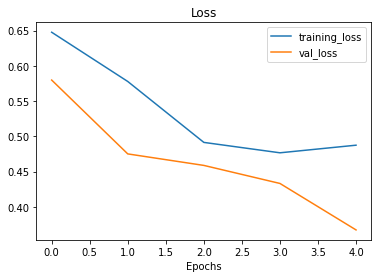

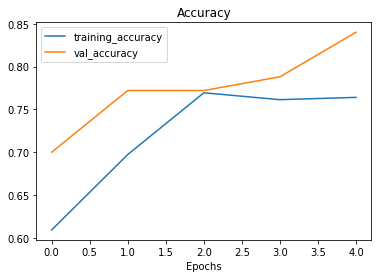

In [46]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

# 7. Repeat until satisified

Ways to improve the model
- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn).
- Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

In [47]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 601ms/step - loss: 0.6264 - accuracy: 0.6267 - val_loss: 0.4389 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.5104 - accuracy: 0.7480 - val_loss: 0.4071 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4812 - accuracy: 0.7780 - val_loss: 0.3629 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 26s 562ms/step - loss: 0.4663 - accuracy: 0.7920 - val_loss: 0.3140 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4740 - accuracy: 0.7840 - val_loss: 0.4327 - val_accuracy: 0.8000


In [48]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [49]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

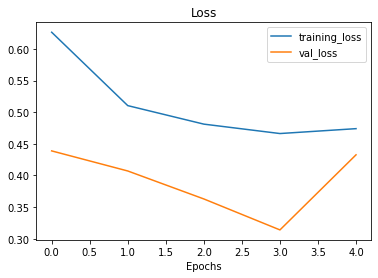

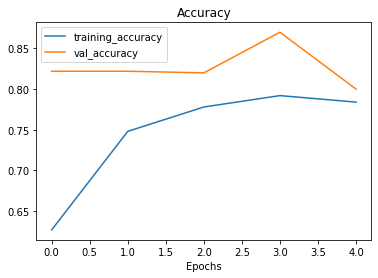

In [50]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

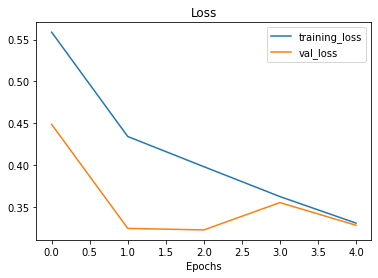

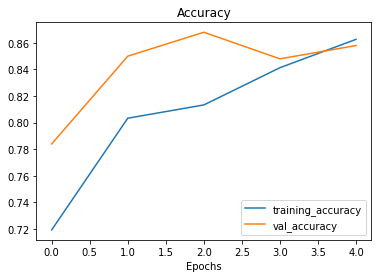

In [51]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

# Making a prediction with our trained model

--2023-02-05 19:47:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-02-05 19:47:47 (230 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



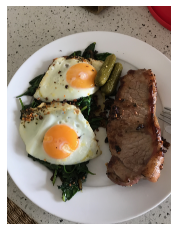

In [52]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Have to reshape since our model takes in image shape of (224, 224, 3)

In [54]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [55]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [57]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

This doesn't work because our model was trained in batches. Batch size becomes the first dimension. 

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

Fix this by adding an extra dimension to custom image tensor using tf.expand_dims


In [58]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [59]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 161ms/step


array([[0.8904816]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

In [60]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [61]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 16ms/step


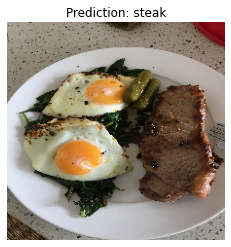

In [62]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-02-05 19:48:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-05 19:48:19 (234 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 23ms/step


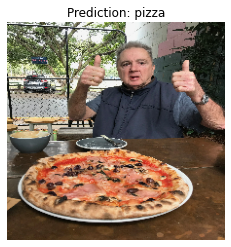

In [63]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multiclass Classification

Working with 10 different food types

Reminder of steps
1. Become one with the data (Visualize data)
2. Preprocess the data (prepare it for the model)
3. Create a model (starting with a baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different parameters to improve model 
7. Repeat until satisfied 

# 1. Import and become one with the data

In [64]:
import zipfile

# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-05 19:48:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   152MB/s    in 3.3s    

2023-02-05 19:48:25 (149 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Check out the different directories and sub-directories

In [65]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

Set up training and test directory paths

In [66]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Get class names from the subdirectories

In [67]:
# Get class names in sorted order
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Visualize an image in training set

Image shape: (512, 512, 3)


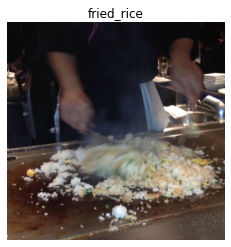

In [68]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2. Preprocess the data (preparing data for the model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale/Normalize the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and split into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create a model (start with a baseline)

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create the model
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 4. Fit the model

In [80]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 223ms/step - loss: 2.1511 - accuracy: 0.2143 - val_loss: 1.9899 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.7972 - accuracy: 0.3783 - val_loss: 1.8309 - val_accuracy: 0.3596
Epoch 3/5
235/235 [==============================] - 51s 219ms/step - loss: 1.3238 - accuracy: 0.5592 - val_loss: 2.0716 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 0.6402 - accuracy: 0.7971 - val_loss: 2.7032 - val_accuracy: 0.3112
Epoch 5/5
235/235 [==============================] - 52s 220ms/step - loss: 0.1770 - accuracy: 0.9489 - val_loss: 4.0718 - val_accuracy: 0.2672


# 5. Evaluate the model

In [81]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 4.0718 - accuracy: 0.2672


[4.071794509887695, 0.2671999931335449]

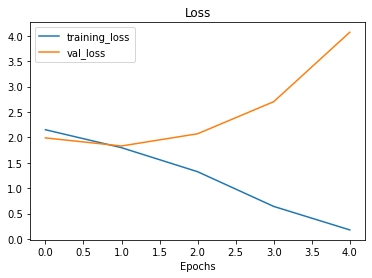

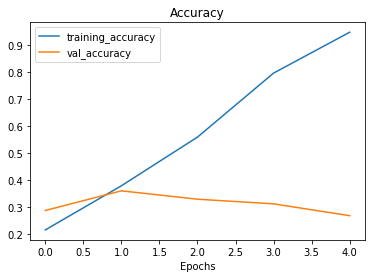

In [82]:
# Plot loss curves
plot_loss_curves(history_9)

Large gap between training and validation loss curves indicates that our model is OVERFITTING

# 6. Adjust the model parameters

Ways to prevent overfitting:
- Get more data - more data = more opportunities to learn patterns
- Simplify the model - reduce number of layers as model may be too complex
- Use data augmentation - manipulate training data so that its harder for model to learn (artifically adds variety to data). If its able to learn through augmented data, it may perform better with regular data
- Use transfer learning - Use existing model's pattern/foundation and tweak it to our problem context

Try simplifying the model by removing layers

In [83]:
# Trying a simplified model with 2 layers removed
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 212ms/step - loss: 2.0806 - accuracy: 0.2596 - val_loss: 1.8761 - val_accuracy: 0.3324
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.6951 - accuracy: 0.4343 - val_loss: 1.9302 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.2921 - accuracy: 0.5917 - val_loss: 1.9485 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 55s 232ms/step - loss: 0.8244 - accuracy: 0.7552 - val_loss: 2.2467 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 47s 201ms/step - loss: 0.4264 - accuracy: 0.8877 - val_loss: 2.5120 - val_accuracy: 0.3244


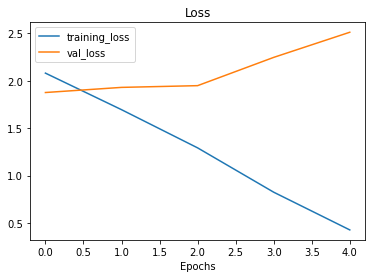

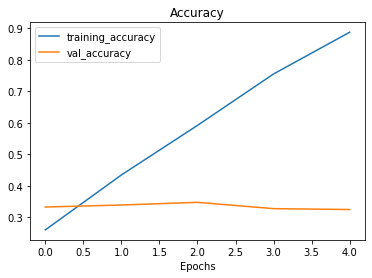

In [84]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Looks like model is still overfitting....

Try data augmentation instead

Recreate a new ImageDataGenerator instance and add extra parameters 'rotation_range', 'horizontal_flip' to manipulate image

In [85]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Using clone_model function in TensorFlow to take existing model and rebuild it in same format

In [86]:
# Clone the model 
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model 
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 117s 497ms/step - loss: 2.2469 - accuracy: 0.1868 - val_loss: 2.0917 - val_accuracy: 0.2532
Epoch 2/5
235/235 [==============================] - 120s 511ms/step - loss: 2.1141 - accuracy: 0.2461 - val_loss: 2.0211 - val_accuracy: 0.2888
Epoch 3/5
235/235 [==============================] - 118s 501ms/step - loss: 2.0712 - accuracy: 0.2609 - val_loss: 1.9482 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 120s 512ms/step - loss: 2.0380 - accuracy: 0.2784 - val_loss: 1.9199 - val_accuracy: 0.3172
Epoch 5/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0077 - accuracy: 0.2943 - val_loss: 1.9009 - val_accuracy: 0.3368


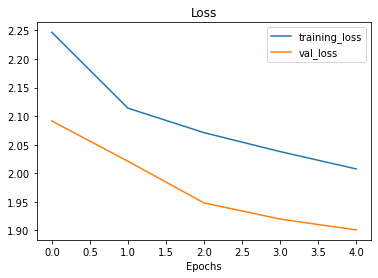

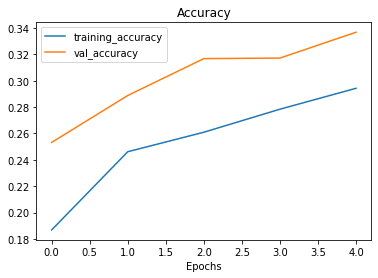

In [87]:
# Check out model using augmented data
plot_loss_curves(history_11)

Much better performance! 

# 7. Repeat until satisfied

- Can try:
 - adding more layers
 - adjusting learning
 - different methods of data augmentation
 - training for longer

Haven't overed yet ... transfer learning

# Making predictions with trained model

In [88]:
# Get some sample images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [89]:
# Adjust function to work with both binary-classification and multi-classification
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Try making some predictions

1/1 [==============================] - 0s 77ms/step


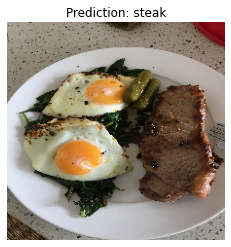

In [90]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 14ms/step


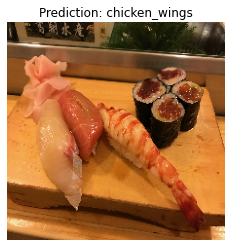

In [98]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


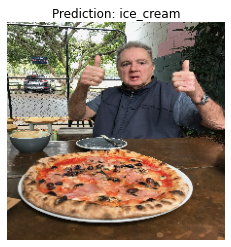

In [96]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


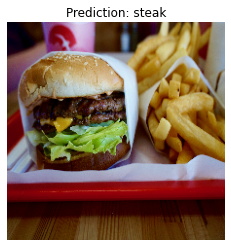

In [97]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)